In [33]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [8]:
df = pd.read_csv("Salary_dataset.csv")

In [9]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df = df.drop('Unnamed: 0', axis=1)

### Data Exploration

In [11]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [15]:
print("Summary Statistics for Numerical Features:")
print(df.describe())

# For more detailed statistics, you can also use:
print("\nDetailed Statistics:")
print("Dataset Shape:", df.shape)
print("\nMean values:")
print(df.mean())
print("\nMedian values:")
print(df.median())
print("\nStandard Deviation:")
print(df.std())
print("\nVariance:")
print(df.var())
print("\nSkewness:")
print(df.skew())
print("\nKurtosis:")
print(df.kurtosis())

Summary Statistics for Numerical Features:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000

Detailed Statistics:
Dataset Shape: (30, 2)

Mean values:
YearsExperience        5.413333
Salary             76004.000000
dtype: float64

Median values:
YearsExperience        4.8
Salary             65238.0
dtype: float64

Standard Deviation:
YearsExperience        2.837888
Salary             27414.429785
dtype: float64

Variance:
YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

Skewness:
YearsExperience    0.37956
Salary             0.35412
dtype: float64

Kurtosis:
YearsExperience   -1.012212
Salary            -1.295421
dtype: float64


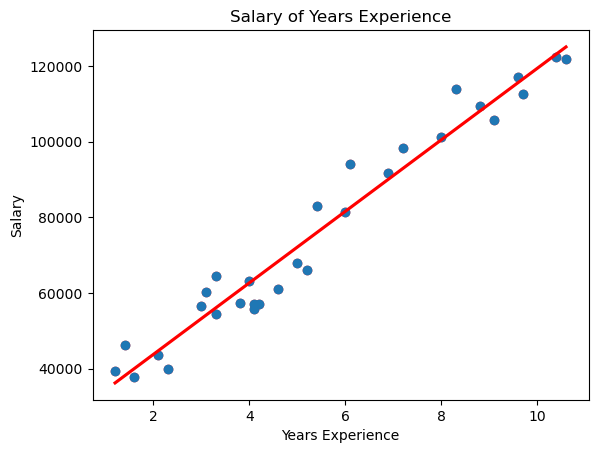

In [36]:
sns.regplot(x='YearsExperience', y='Salary', data=df, ci=None, color='red')
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary of Years Experience')
plt.show()

In [34]:
sns.histplot(df['Salary'], kde=True)
sns.histplot(df['YearsExperience'], kde=True)

<Axes: xlabel='Salary', ylabel='Count'>

In [17]:
X = df[['YearsExperience']] #feature
y = df['Salary'] #target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print(f"Equation: Salary = {model.coef_[0]:.2f}*YearsExperience + {model.intercept_:.2f}")

Coefficient (slope): 9423.81532303098
Intercept: 24380.20147947369
Equation: Salary = 9423.82*YearsExperience + 24380.20


### Prediction & evaluation

In [40]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 6286.453830757745
MSE: 49830096.855908334
RMSE: 7059.043621901506
R2: 0.9024461774180498


In [41]:
cv_mae = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
print("CV MAE:", cv_mae, "CV R2:", cv_r2)


CV MAE: 4483.11173992825 CV R2: 0.8971521848581107


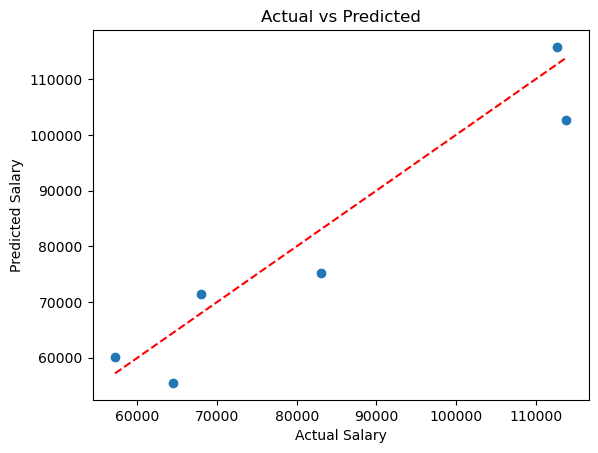

In [43]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted')
plt.show()


### Model saving

In [44]:
with open("salary_linear_model.pkl", "wb") as f:
    pickle.dump(model, f)
